In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, RankVariantsSort2, RankVariantsDFGTr, RankVariantsDFGBrute

In [2]:
import pandas as pd
import numpy as np
import random

In [3]:
n1 = [0.2, 0.02]
n2 = [0.3,0.02]
cfg = {}

for i in range(5):
    cfg['t{}'.format(i)] = n1

for i in range(5,10):
    cfg['t{}'.format(i)] = n2
#cfg
h0 = list(cfg.keys())
#random.shuffle(h0)

In [4]:
ms = MeasurementsSimulator(cfg, 'normal',seed=2) #5, 61 (149, 5, eg for not always the min rank)
ms.measure(15,1) # 3 and 10#
# Repeat for seed = 1; not always possible into two classes
# An example for min rank not always possible

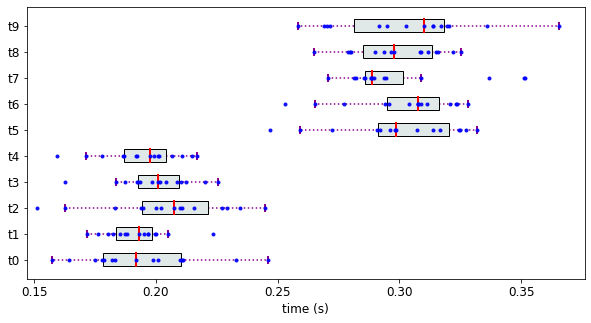

In [5]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=12, scale=0.5)

In [182]:
fig.savefig("gviz/hasse-eg-1.pdf", format="pdf", bbox_inches="tight")

In [175]:
#rvDFGBr = RankVariantsDFGBrute(ms.get_alg_measurements(), h0)
##rvDFGBr.rank_variants()

In [6]:
rvDFG = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [7]:
rvDFG.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,0
2,t2,0
3,t3,0
4,t4,0
5,t5,1
6,t6,1
7,t7,1
8,t8,1
9,t9,1


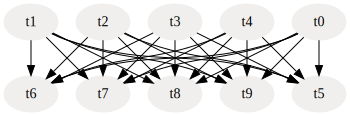

In [8]:
rvDFG.graph.transitivity_reduction()
g = rvDFG.graph.visualize()
g

In [9]:
g.render(filename='gviz/hasse-eg-1-dfg', format='pdf')

'gviz/hasse-eg-1-dfg.pdf'

In [10]:
ms = MeasurementsSimulator(cfg, 'normal',seed=2) 
ms.measure(3,1)

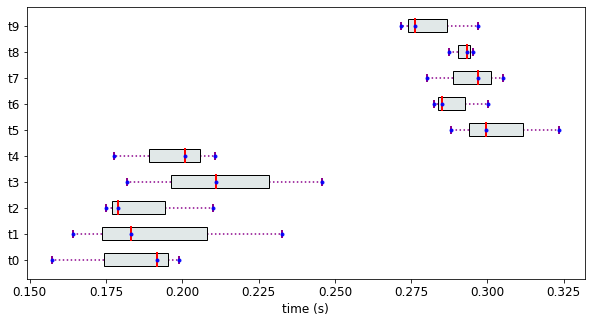

In [11]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=12, scale=0.5)

In [12]:
fig.savefig("gviz/hasse-eg-2.pdf", format="pdf", bbox_inches="tight")

In [13]:
rvDFG = RankVariantsDFGTr(ms.get_alg_measurements(), h0)
rvDFG.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,0
2,t2,0
3,t4,0
4,t3,1
5,t6,2
6,t9,2
7,t5,3
8,t7,3
9,t8,3


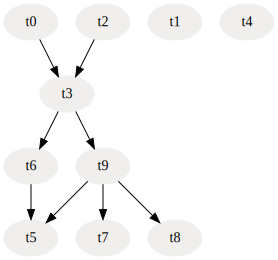

In [14]:
rvDFG.graph.transitivity_reduction()
g = rvDFG.graph.visualize()
g

In [15]:
g.render(filename='gviz/hasse-eg-2-dfg', format='pdf')

'gviz/hasse-eg-2-dfg.pdf'

In [16]:
h0_ = rvDFG.graph.get_separable_arrangement()
h0_

['t0', 't2', 't1', 't4', 't3', 't9', 't6', 't7', 't8', 't5']

In [17]:
rv2 = RankVariantsSort2(ms.get_alg_measurements(), h0_)
rv2.rank_variants()

,case:concept:name,case:rank:q75-q25
0,t0,0
1,t2,0
2,t1,0
3,t4,0
4,t3,0
5,t9,1
6,t6,1
7,t7,1
8,t8,1
9,t5,1


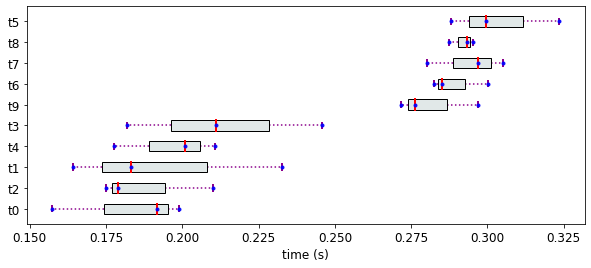

In [19]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0_)
fig = mv.show_measurements_boxplots(tick_size=12, scale=0.4)

In [22]:
fig.savefig("gviz/hasse-eg2-r.svg", format="svg", bbox_inches="tight")

In [43]:

for i in range(100):
    ms_ = MeasurementsSimulator(cfg, 'normal',seed=i) 
    ms_.measure(3,1)
    rvDFG_ = RankVariantsDFGTr(ms_.get_alg_measurements(), h0)
    rvDFG_.rank_variants()
    h0_ = rvDFG_.graph.get_separable_arrangement()
    rv2_ = RankVariantsSort2(ms_.get_alg_measurements(), h0_)
    x = rv2_.rank_variants().iloc[:,1].nunique()
    print(i,x)

0 3
1 4
2 2
3 2
4 2
5 2
6 2
7 2
8 3
9 2
10 3
11 2
12 2
13 2
14 3
15 3
16 2
17 2
18 4
19 3
20 2
21 4
22 3
23 2
24 2
25 2
26 2
27 3
28 2
29 2
30 2
31 3
32 3
33 2
34 2
35 2
36 2
37 2
38 3
39 3
40 2
41 2
42 2
43 2
44 3
45 2
46 3
47 3
48 2
49 2
50 2
51 2
52 2
53 4
54 3
55 2
56 2
57 2
58 3
59 2
60 2
61 3
62 2
63 3
64 2
65 2
66 2
67 2
68 3
69 3
70 2
71 3
72 3
73 5
74 2
75 2
76 2
77 3
78 2
79 3
80 2
81 3
82 2
83 2
84 3
85 2
86 2
87 2
88 2
89 2
90 2
91 3
92 2
93 3
94 3
95 2
96 3
97 3
98 3
99 3
